In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('Customer Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#Replacing blanks with 0 and tenure is 0 and not total charges are recorded

In [9]:
df ["TotalCharges"] = df["TotalCharges"].replace(" ", "0")
df ["TotalCharges"] = df["TotalCharges"].astype("float")

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [14]:
df.isnull().sum().sum()

np.int64(0)

In [15]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [20]:
df["customerID"].duplicated().sum()

np.int64(0)

In [31]:
def conv(value):
    if value == 1:
        return  "Yes"
    else:
        return "No"
        
df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)

#Converted 0 and 1 value of senior citizen to yes/no to make is easier to understand.

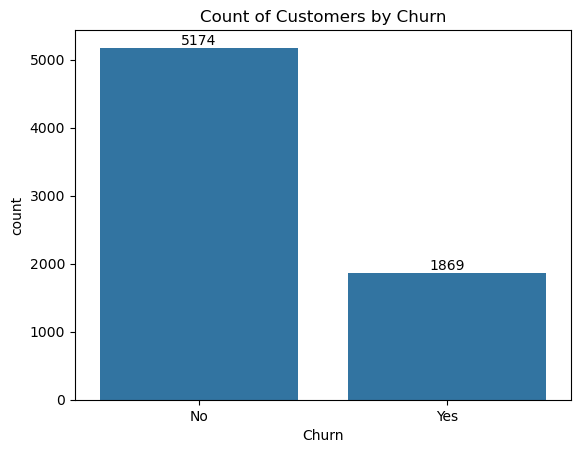

In [46]:
ax = sns.countplot(x = "Churn", data = df)

ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Churn")
plt.show ()

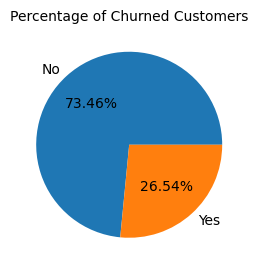

In [47]:
plt.figure(figsize = (3, 4))
gb = df.groupby("Churn").agg({"Churn" : "count"})
plt.pie(gb["Churn"], labels = gb.index, autopct = "%1.2f%%")
plt.title("Percentage of Churned Customers", fontsize = 10)
plt.show()

#from the given pie chart we can conclude that 26.54% of our customers have churned out.
#now lets explore the reason behind it 

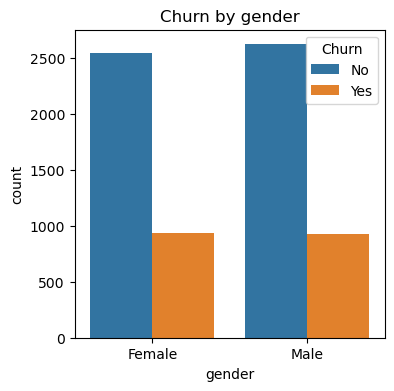

In [53]:
plt.figure(figsize = (4, 4))
sns.countplot(x= "gender", data = df, hue = "Churn")
plt.title("Churn by gender")
plt.show()

#Churned by specific gender.

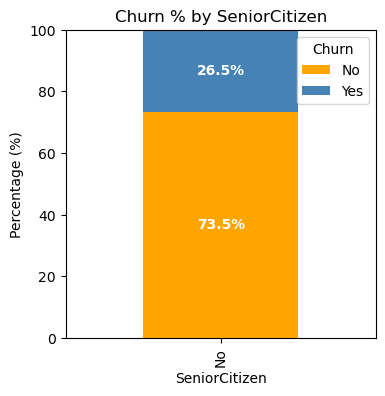

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a crosstab with percentages
ct = pd.crosstab(df['SeniorCitizen'], df['Churn'], normalize='index') * 100

# Plot stacked bar chart with orange and blue colors
ct.plot(kind='bar', stacked=True, figsize=(4, 4), color=['orange', 'steelblue'])

# Add % labels inside bars
for i, row in enumerate(ct.values):
    cum_sum = 0
    for val in row:
        plt.text(i, cum_sum + val/2, f'{val:.1f}%', ha='center', va='center', fontsize=10, color='white', fontweight='bold')
        cum_sum += val

# Titles and labels
plt.title('Churn % by SeniorCitizen')
plt.xlabel('SeniorCitizen')
plt.ylabel('Percentage (%)')
plt.legend(title='Churn', loc='upper right')
plt.ylim(0, 100)

plt.show()


#percentage of people in senior citizen category have churned

<function matplotlib.pyplot.show(close=None, block=None)>

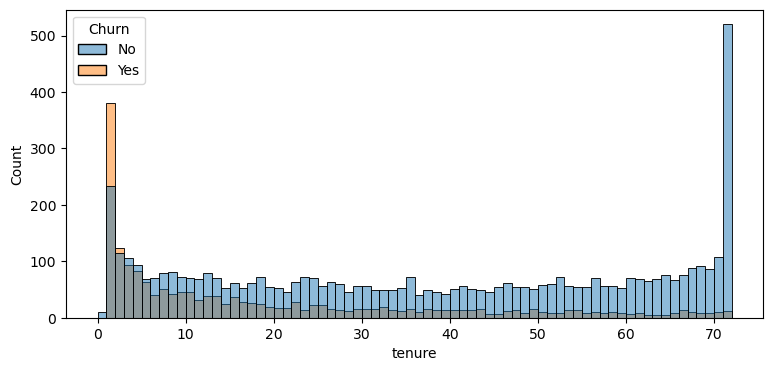

In [63]:
plt.figure(figsize = (9, 4))
sns.histplot(x = "tenure", data = df, bins = 72, hue = "Churn")
plt.show

#people who have use our services for a long time stayed and people who have used our services 1 or 2 month have churn

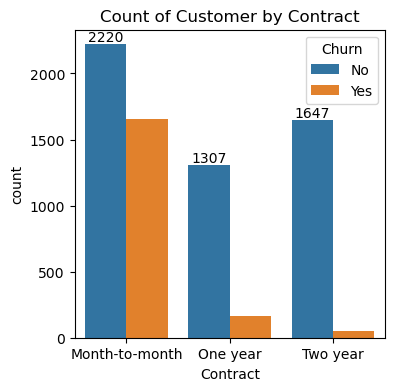

In [68]:
plt.figure(figsize = (4, 4))
ax = sns.countplot(x= "Contract", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of Customer by Contract")
plt.show()

#people who have month to month contract are likely to churn then from those who have 1 or 2 years or contract 

In [69]:
df.columns.values 

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

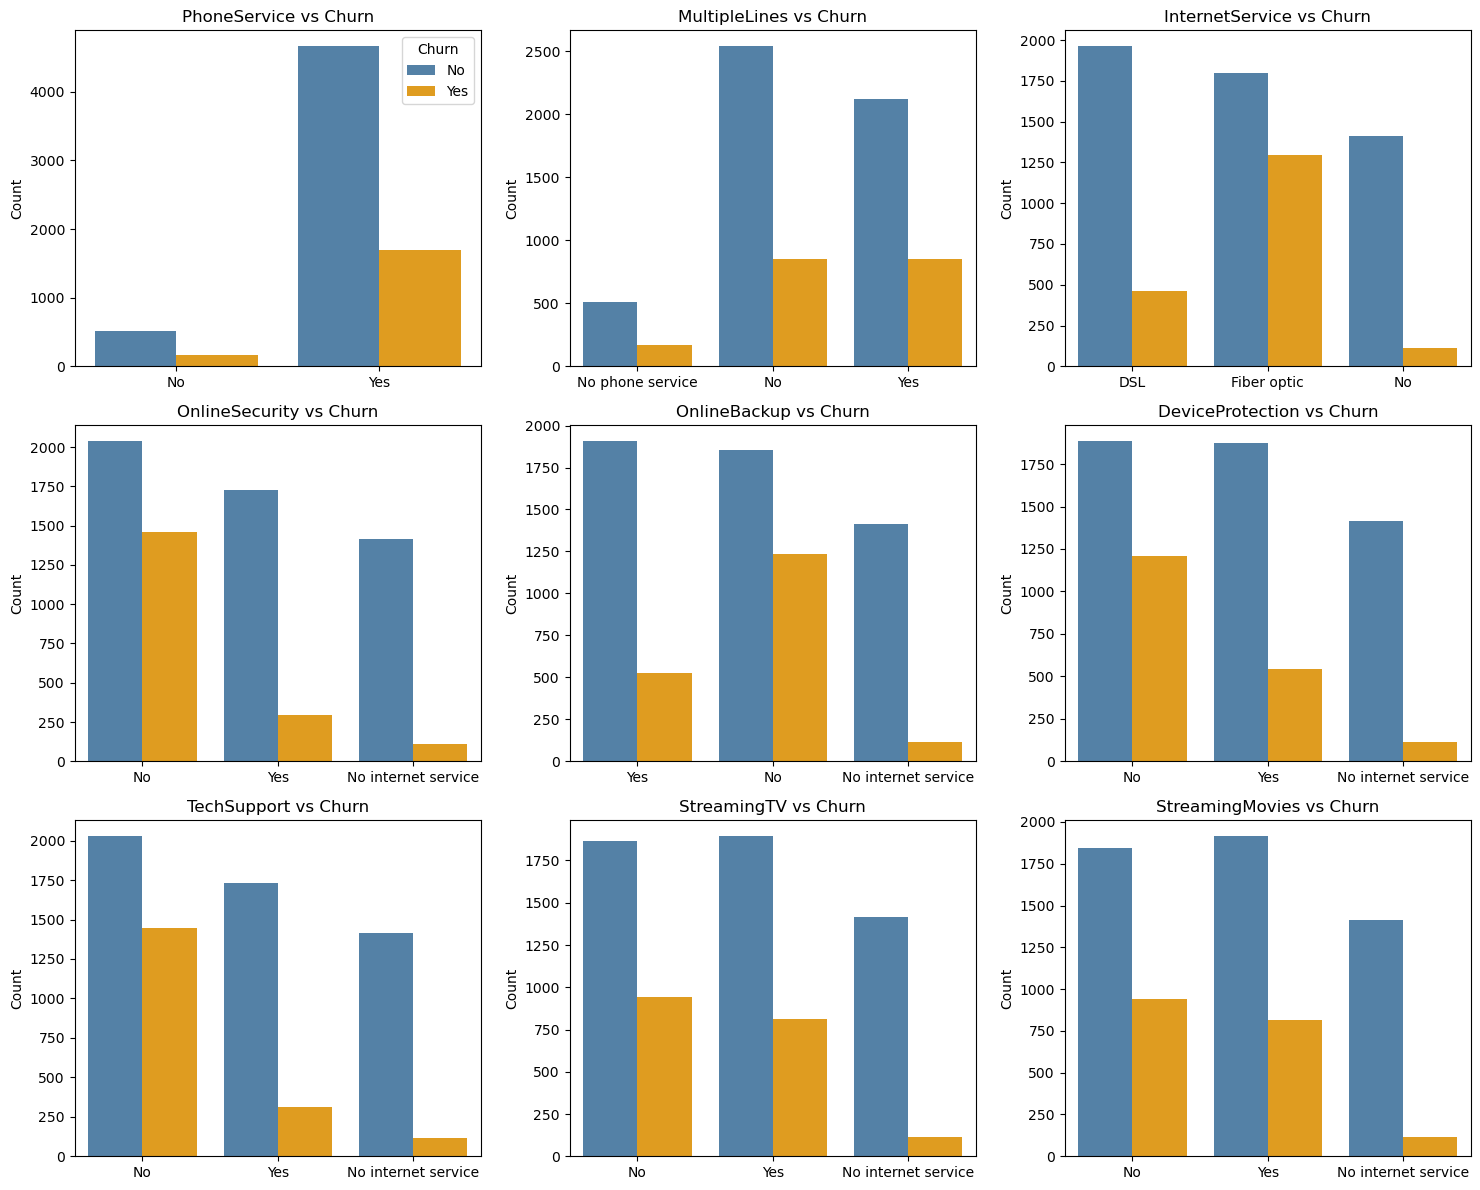

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of categorical columns
cols = ['PhoneService', 'MultipleLines', 'InternetService',
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies']

# Set figure size and layout (3 rows × 3 columns)
plt.figure(figsize=(15, 12))

# Loop through columns and create subplots
for i, col in enumerate(cols, 1):
    plt.subplot(3, 3, i)  # 3x3 grid
    sns.countplot(x=col, data=df, hue='Churn', palette=['steelblue', 'orange'])
    plt.title(f'{col} vs Churn', fontsize=12)
    plt.xlabel('')
    plt.ylabel('Count')

    # Move legend only for first plot
    if i == 1:
        plt.legend(title='Churn', loc='upper right')
    else:
        plt.legend([],[], frameon=False)

# Adjust layout
plt.tight_layout()
plt.show()


#The countplots reveal that customers lacking internet-related services (like TechSupport, OnlineSecurity, or OnlineBackup) tend to churn more often.
Fiber optic users show a notably higher churn rate compared to DSL users.
Overall, customers without additional services such as DeviceProtection or Streaming options are more likely to leave, suggesting that bundled or supportive services help retain customers.

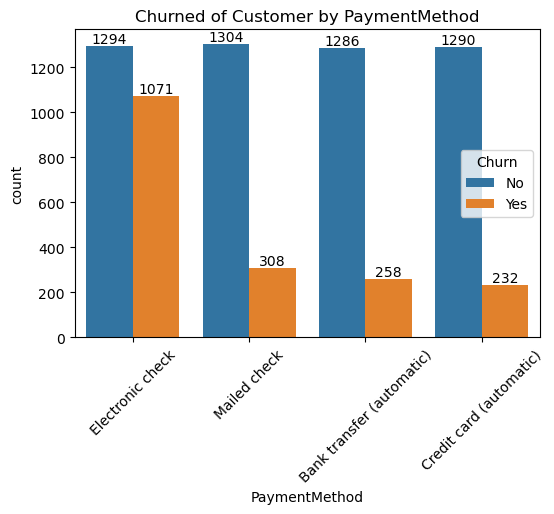

In [83]:
plt.figure(figsize = (6, 4))
ax = sns.countplot(x= "PaymentMethod", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churned of Customer by PaymentMethod")
plt.xticks(rotation = 45)
plt.show()

#Customer likely to churn when he is using electronic check as payment method

In [85]:
df.to_csv('C:/Users/simran/Downloads/Updated_Customer_Churn.csv', index=False)
